In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


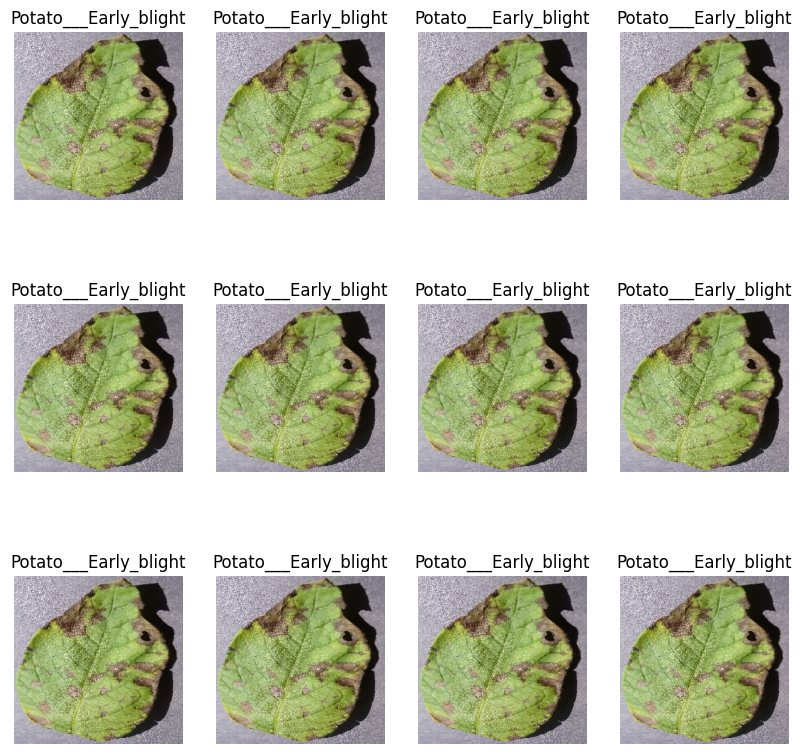

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")
    
     

In [7]:
len(dataset)

68

In [8]:
80% ==> training
20% ==> 10% validation, 10% test 

SyntaxError: invalid syntax (2427660459.py, line 1)

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = datas 
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)


14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)



6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)


8

In [15]:
def get_dataset_partitions_tf(ds, train_split= 0.8, val_split = 0.1, test_split=0.1, shuffle= True, shuffle_size=10000  ):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int (train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds,val_ds,test_ds


    


In [16]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose = 1,
validation_data =val_ds
    
)

Epoch 1/50


54/54 [==============================] - 114s 2s/step - loss: 0.9117 - accuracy: 0.4994 - val_loss: 0.8495 - val_accuracy: 0.4792
Epoch 2/50
54/54 [==============================] - 82s 2s/step - loss: 0.7824 - accuracy: 0.6337 - val_loss: 0.5873 - val_accuracy: 0.7240
Epoch 3/50
54/54 [==============================] - 88s 2s/step - loss: 0.5163 - accuracy: 0.7708 - val_loss: 0.3587 - val_accuracy: 0.8385
Epoch 4/50
54/54 [==============================] - 86s 2s/step - loss: 0.3532 - accuracy: 0.8582 - val_loss: 0.3150 - val_accuracy: 0.8594
Epoch 5/50
54/54 [==============================] - 88s 2s/step - loss: 0.2864 - accuracy: 0.8929 - val_loss: 0.3629 - val_accuracy: 0.8698
Epoch 6/50
54/54 [==============================] - 85s 2s/step - loss: 0.2996 - accuracy: 0.8721 - val_loss: 0.1953 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 86s 2s/step - loss: 0.2467 - accuracy: 0.9039 - val_loss: 0.1534 - val_accuracy: 0.9479
Epoch 8/50
54/54 

In [27]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 141s 614ms/step - loss: 0.0060 - accuracy: 1.0000


In [28]:
scores

[0.006026365328580141, 1.0]

In [29]:
history

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history[loss]
val_loss = history.history['val_loss']

NameError: name 'loss' is not defined

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 425ms/step
predicted label: Potato___Early_blight


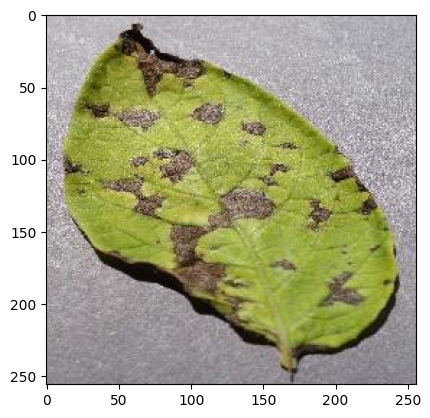

In [43]:
import numpy as np
import matplotlib.pyplot as plt

for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()  
    print('first image to predict')
    plt.imshow(first_image)  # Corrected typo here
    print('actual label:', class_names[first_label]) 
    batch_prediction = model.predict(image_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])



In [71]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add a batch dimension
    predictions = model.predict(img_array)
    predict_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]))
    return predict_class, confidence


1/1 [==============================] - 0s 88ms/step


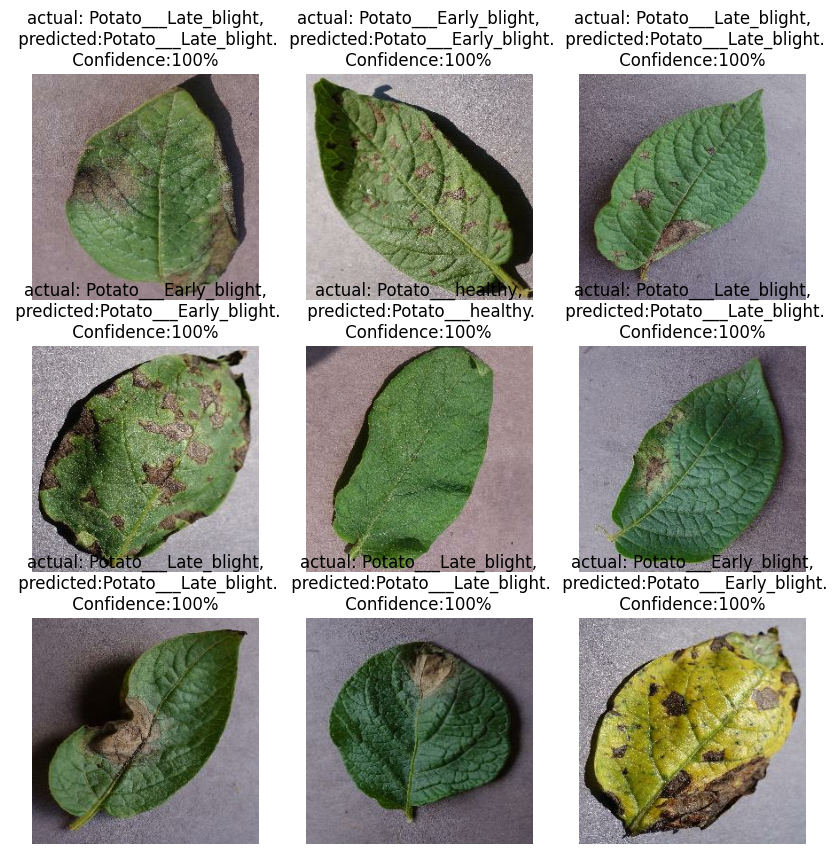

In [76]:
plt.figure(figsize=(10,10))
for image, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, image[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"actual: {actual_class},\n predicted:{predicted_class}.\n Confidence:{confidence}% ")
        plt.axis('off')

        

In [80]:
import os
model_version =  max([int(i) for i in os.listdir("../model") + [0]])+1

In [78]:
model_version = 1
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/1\assets


INFO:tensorflow:Assets written to: ../model/1\assets
